<a href="https://colab.research.google.com/github/Sukrut11/HR-Employee-Attrition/blob/main/TCR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Employee Attrition Prediction

##Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/HR_Employee_Attrition-1.csv")
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,1470.500000,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,848.849221,9.133819,403.440447,8.105485,1.023991,0.0,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,7116.575021,2.497584,3.659315,0.360762,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,735.750000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8045.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1470.500000,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2205.250000,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2940.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.shape

(2940, 35)

In [ ]:
df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df = df.drop("EmployeeNumber", axis = 1)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)
df["Attrition"].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [ ]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



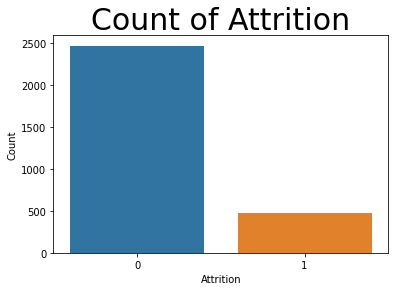

In [ ]:
sns.countplot("Attrition", data = df)
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
colors = ['gold', 'mediumturquoise', 'darkorange']

fig = go.Figure(data=[go.Pie(labels=['Travel_Rarely','Travel_Frequently','Non-Travel'],
                             values=[2086,554,300])])
fig.update_traces(hoverinfo='label+percent', textinfo='label + value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
colors = ['gold', 'red', 'light green']

fig = go.Figure(data=[go.Pie(labels=['Research & Development','Sales','Human Resources'],
                             values=[1922,892,126])])
fig.update_traces(hoverinfo='label+percent', textinfo='label + value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
colors = ['gold', 'red', 'light green', 'blue', 'orange', 'turquoise']

fig = go.Figure(data=[go.Pie(labels=['Life Sciences','Medical','Marketing', 'Technical Degree', 'Other', 'Human Resources'],
                             values=[1212,928,318,264,164])])
fig.update_traces(hoverinfo='label+percent', textinfo='label + value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
colors = ['gold', 'red', 'light green', 'blue', 'orange', 'turquoise', 'purple', 'brown']

fig = go.Figure(data=[go.Pie(labels=['Sales Executive','Research Scientist','Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Research Director', 'Human Resources'],
                             values=[652,584,518,290,262,204,166,160,104])])
fig.update_traces(hoverinfo='label+percent', textinfo='label + value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



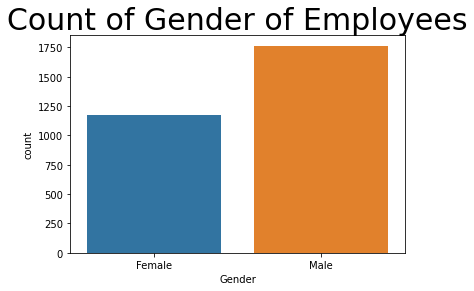

In [ ]:
sns.countplot('Gender', data=df)
plt.title('Count of Gender of Employees', fontsize=30)
plt.xlabel('Gender')
plt.show()

In [ ]:
colors = ['gold', 'red', 'blue']

fig = go.Figure(data=[go.Pie(labels=['Married','Single','Divorced'],
                             values=[1346,940,654])])
fig.update_traces(hoverinfo='label+percent', textinfo='label + value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

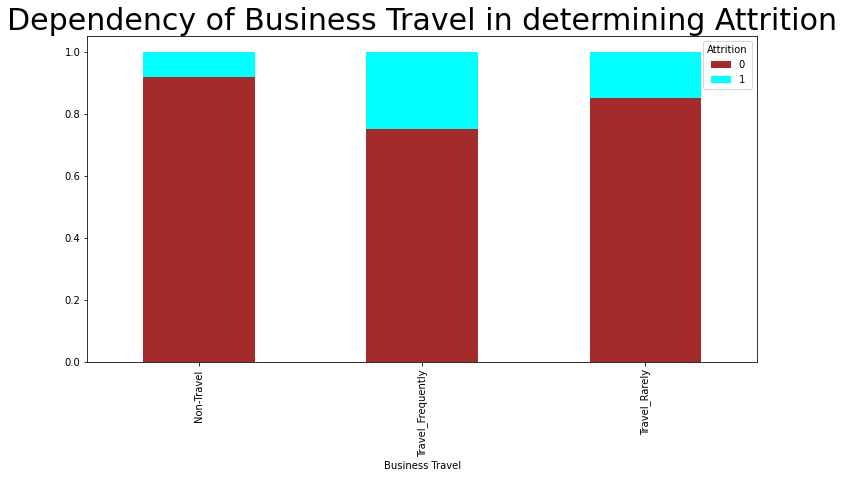

In [ ]:
data=pd.crosstab(df['BusinessTravel'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'cyan'], 
                                                figsize=(12,6))
plt.title('Dependency of Business Travel in determining Attrition', fontsize=30)
plt.xlabel('Business Travel')
plt.show()

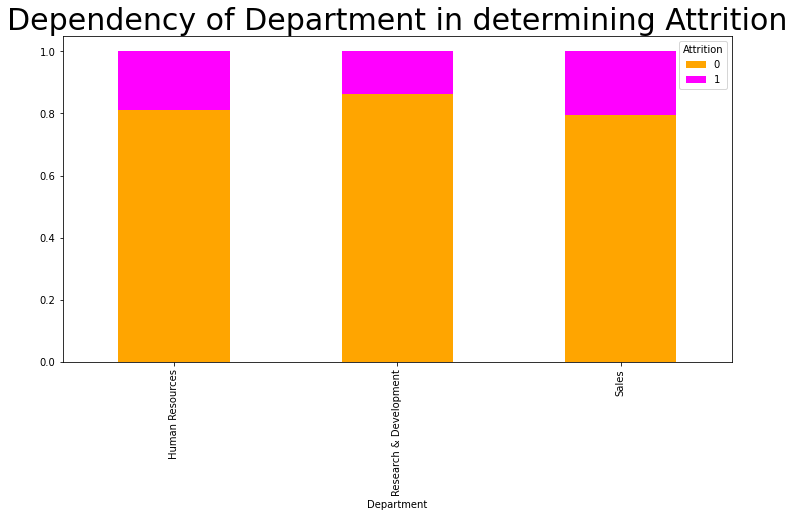

In [ ]:
data=pd.crosstab(df['Department'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
                                                figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30)
plt.xlabel('Department')
plt.show()

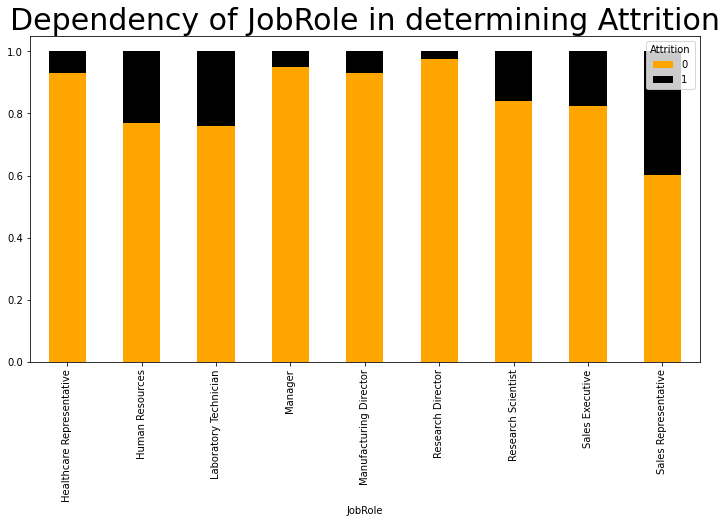

In [ ]:
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30)
plt.xlabel('JobRole')
plt.show()

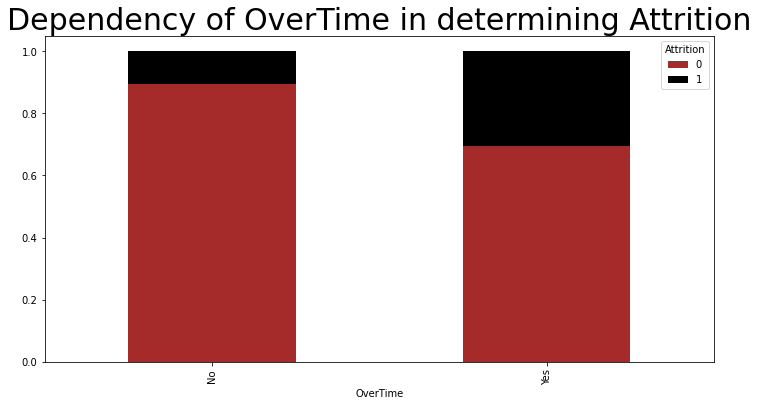

In [ ]:
data=pd.crosstab(df['OverTime'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30)
plt.xlabel('OverTime')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



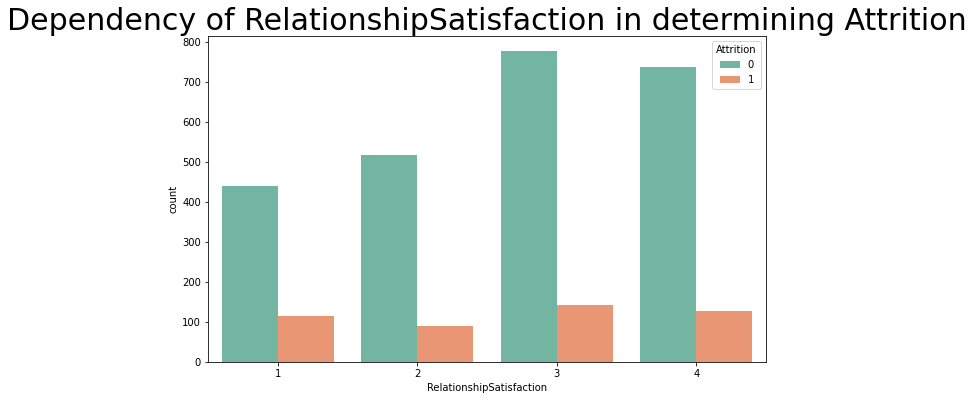

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('RelationshipSatisfaction', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

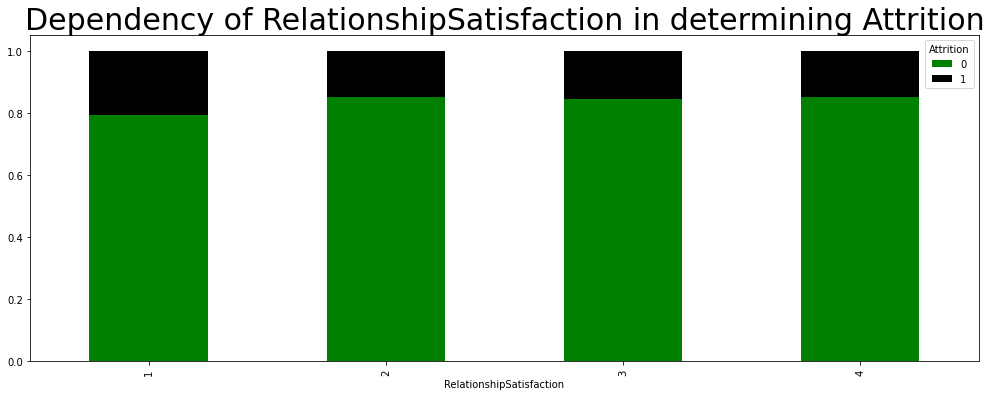

In [ ]:
data=pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['green', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of RelationshipSatisfaction in determining Attrition', fontsize=30)
plt.xlabel('RelationshipSatisfaction')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



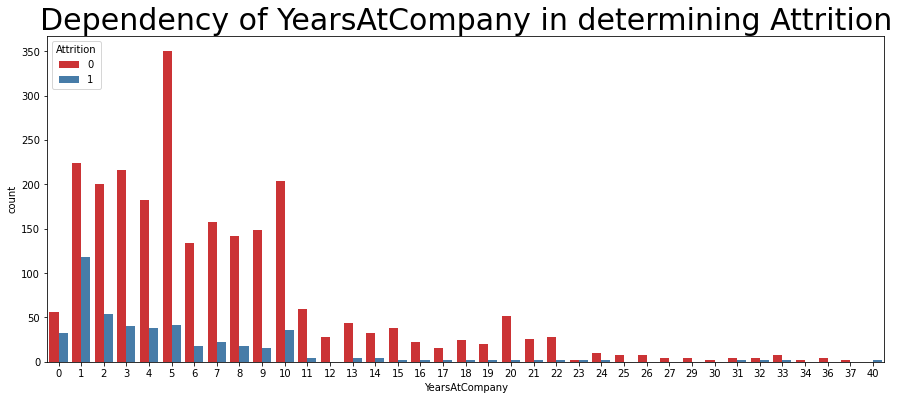

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



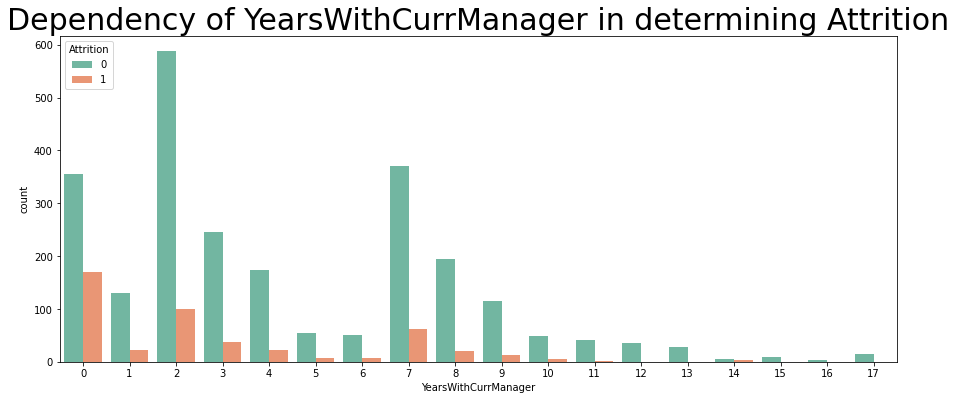

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('YearsWithCurrManager', hue='Attrition', data=df, palette='Set2')
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

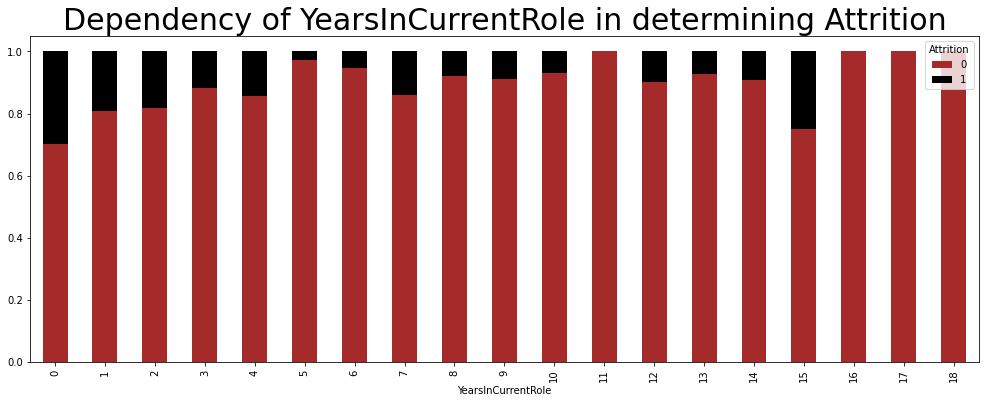

In [ ]:
data=pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsInCurrentRole in determining Attrition', fontsize=30)
plt.xlabel('YearsInCurrentRole')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



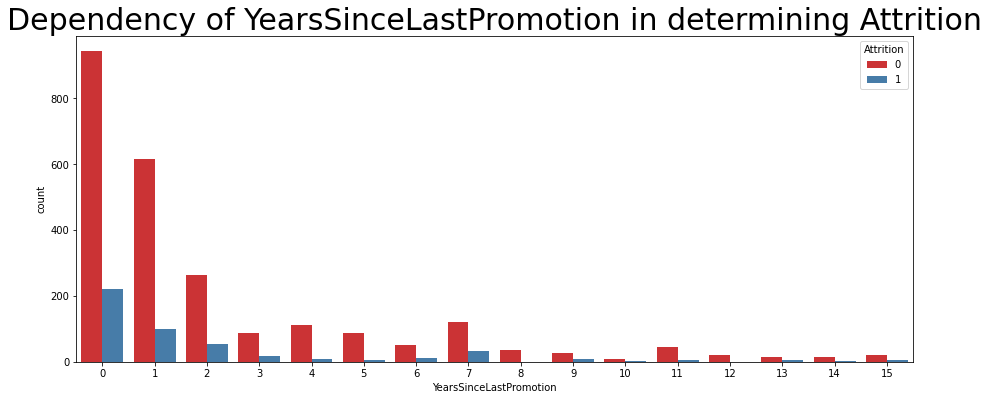

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('YearsSinceLastPromotion', hue='Attrition', data=df, palette='Set1')
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

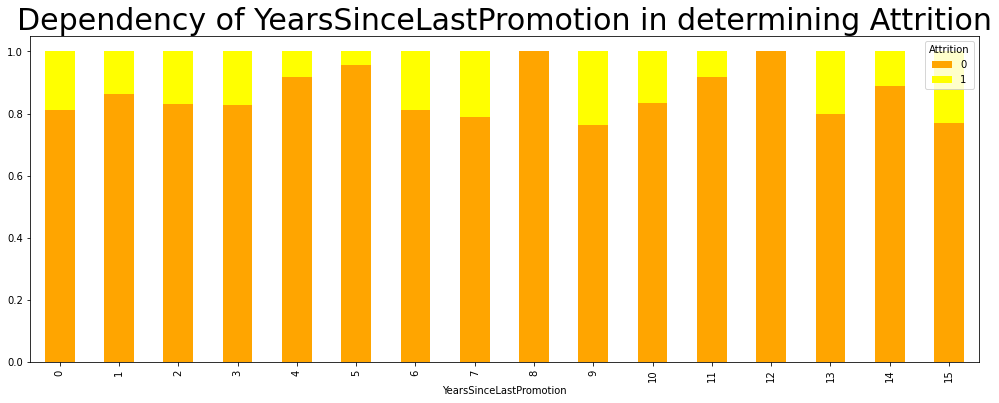

In [ ]:
data=pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30)
plt.xlabel('YearsSinceLastPromotion')
plt.show()

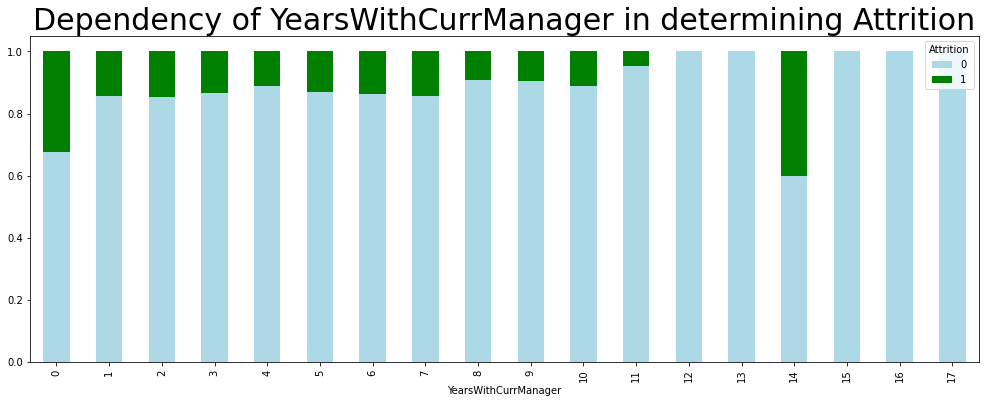

In [ ]:
data=pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['lightblue', 'green'], 
                                                figsize=(17,6))
plt.title('Dependency of YearsWithCurrManager in determining Attrition', fontsize=30)
plt.xlabel('YearsWithCurrManager')
plt.show()

##Feature Engineering

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
numerical_features

['Attrition',
 'Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [ ]:
continuous_features = [feature for feature in df.columns if len(df[feature].unique()) > 10 and df[feature].dtype != "O"]
continuous_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) < 10 or df[feature].dtype == "O"]
discrete_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

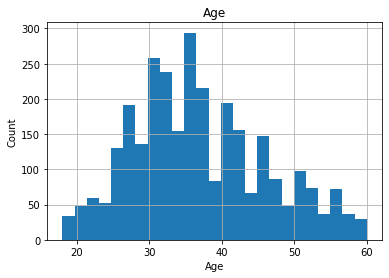

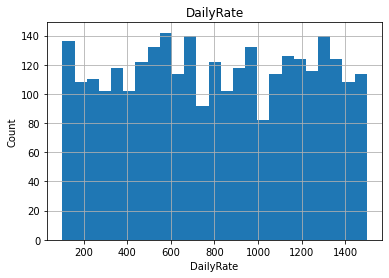

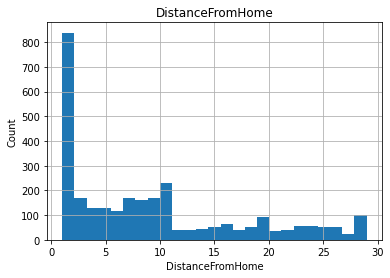

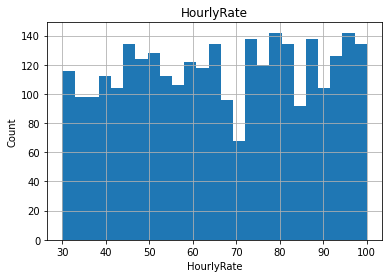

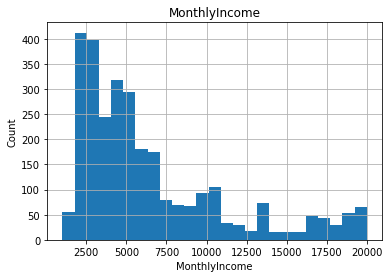

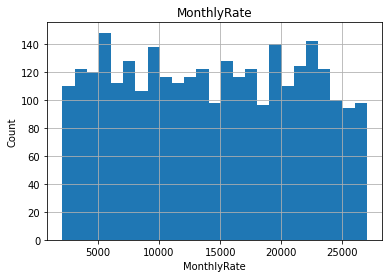

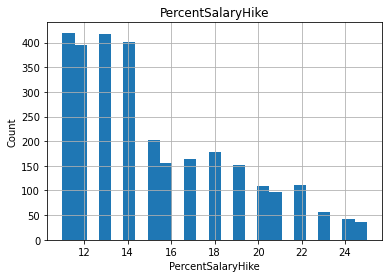

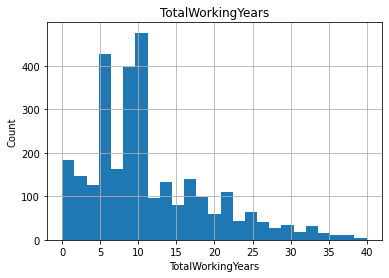

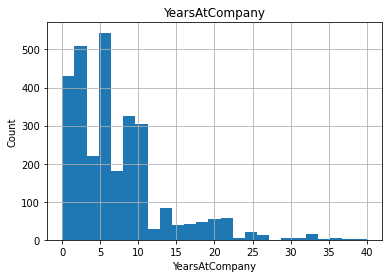

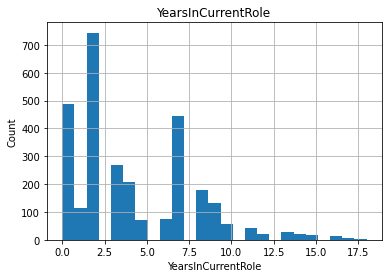

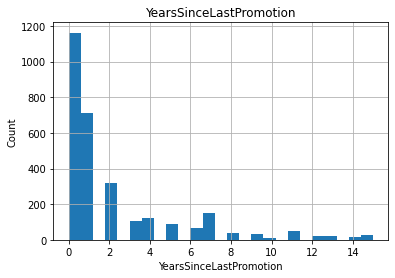

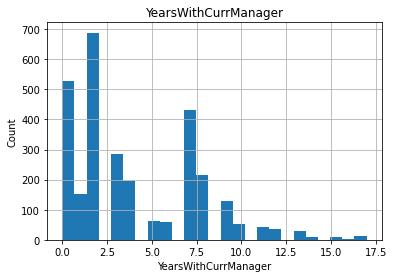

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features:
  data= df.copy()
  data[feature].hist(bins = 25)
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

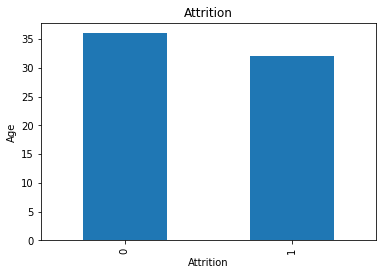

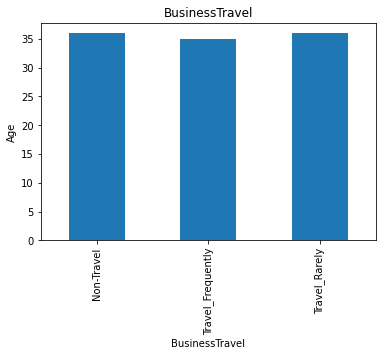

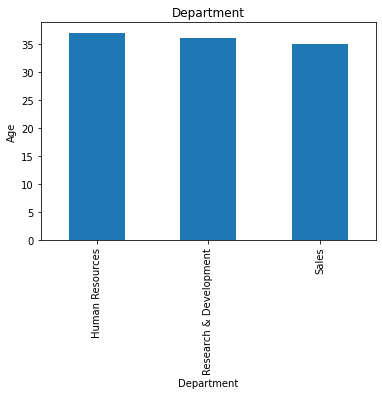

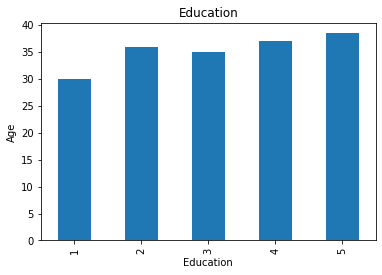

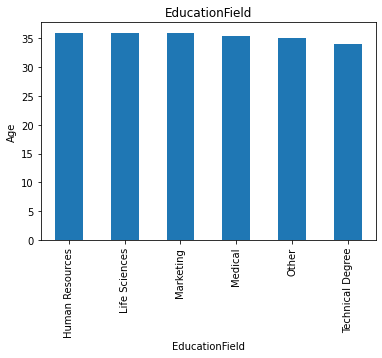

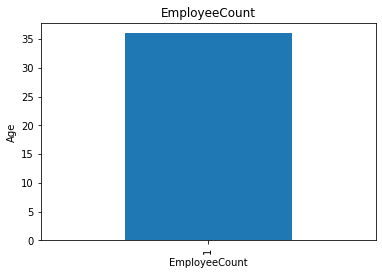

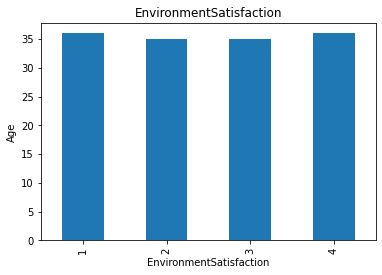

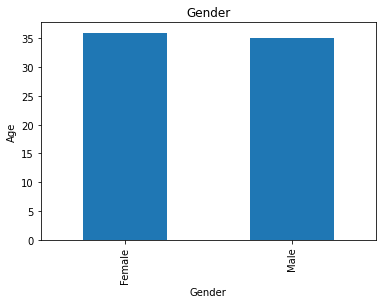

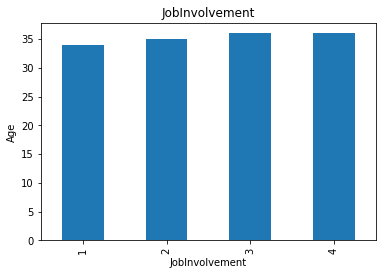

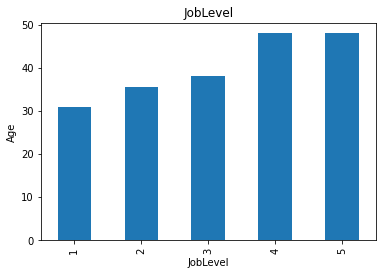

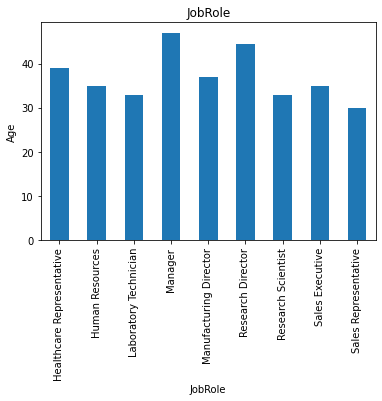

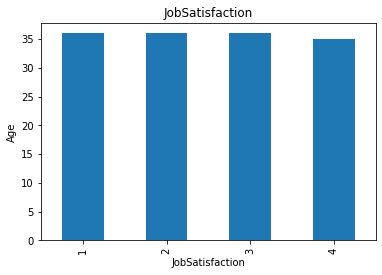

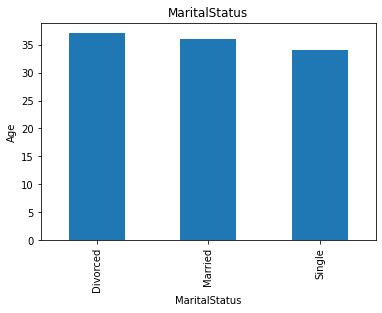

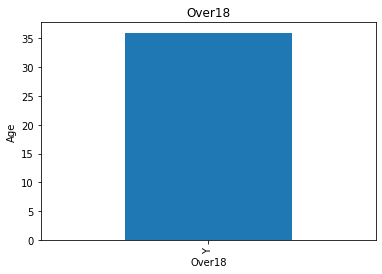

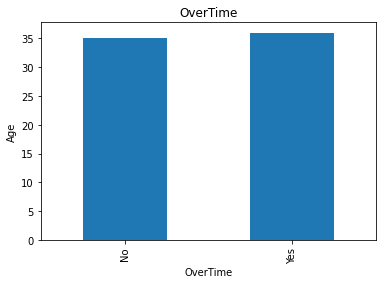

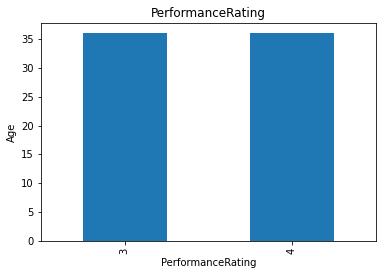

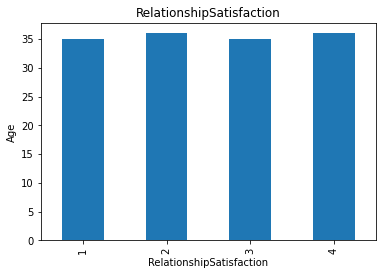

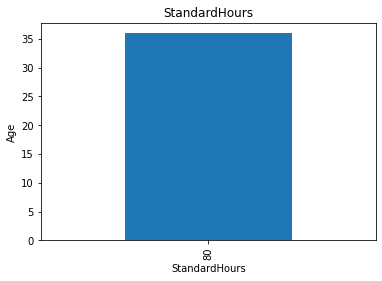

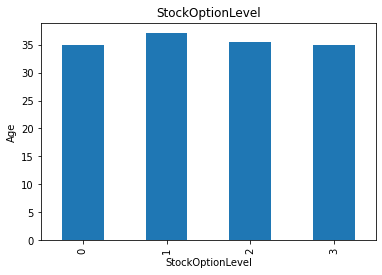

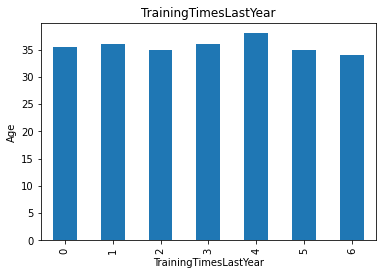

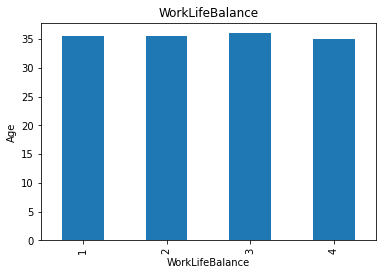

In [ ]:
## Lets Find the relationship between them and Sale PRice
for feature in discrete_features:
  data = df.copy()
  data.groupby(feature)["Age"].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Age")
  plt.title(feature)
  plt.show()

##Converting the skewed distributions to guassian distributions

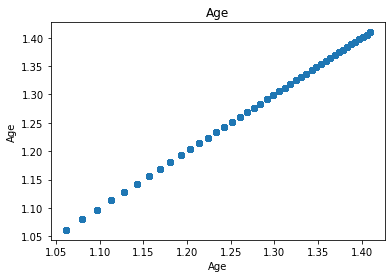

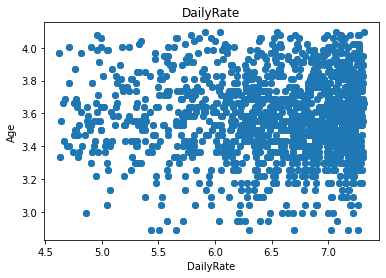

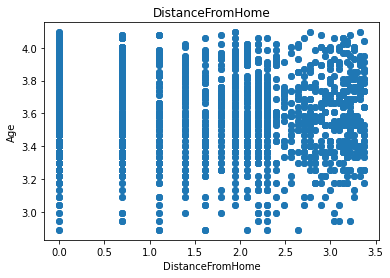

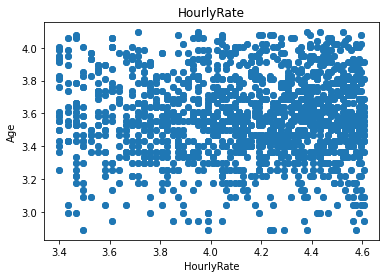

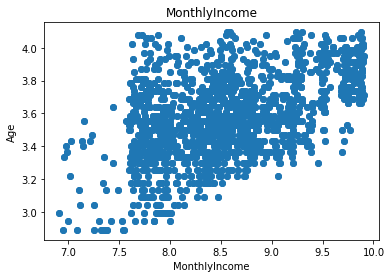

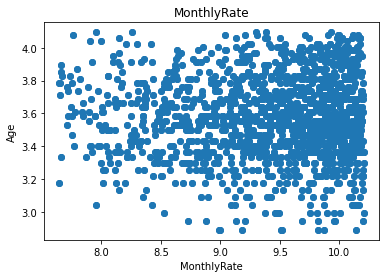

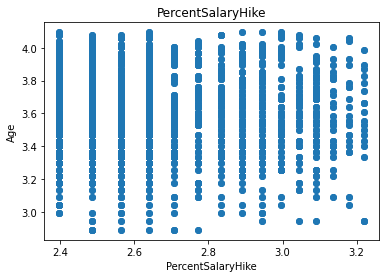

In [ ]:
## We will be using logarithmic transformation
for feature in continuous_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data["Age"] = np.log(data["Age"])
    plt.scatter(data[feature] , data["Age"])
    plt.xlabel(feature)
    plt.ylabel('Age')
    plt.title(feature)
    plt.show()

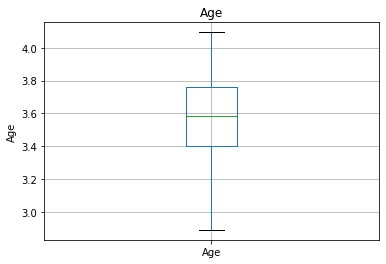

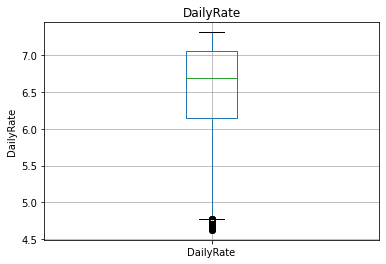

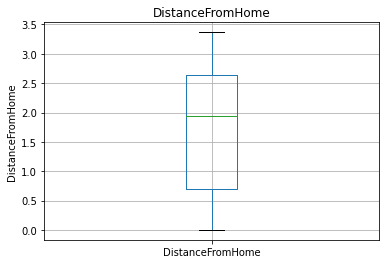

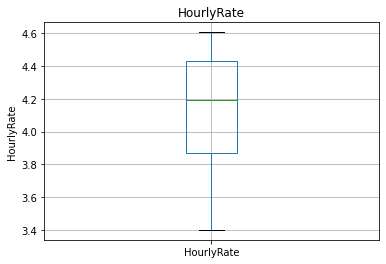

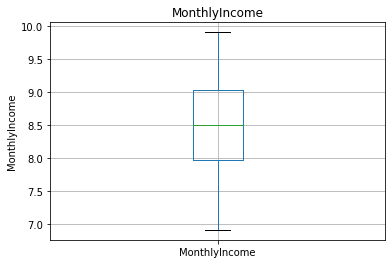

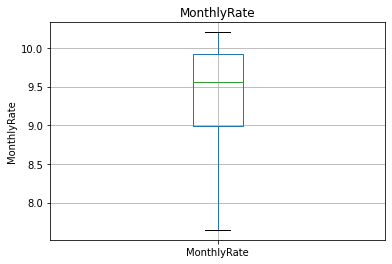

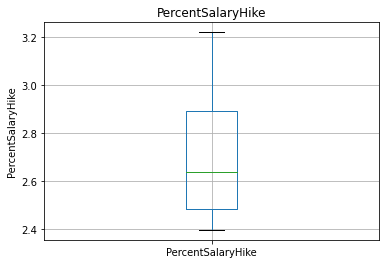

In [ ]:
for feature in continuous_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

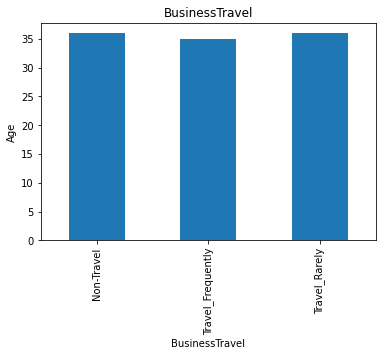

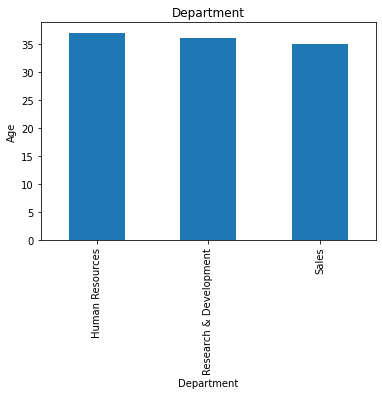

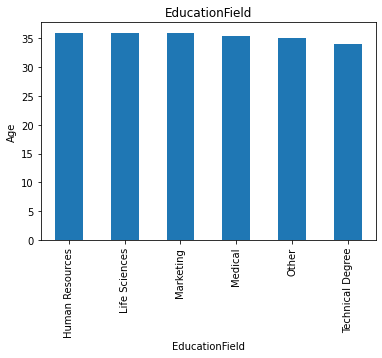

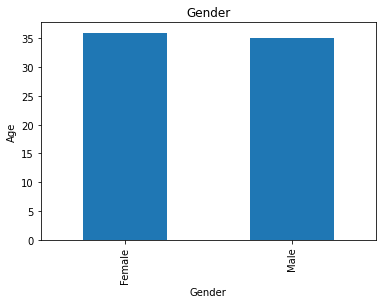

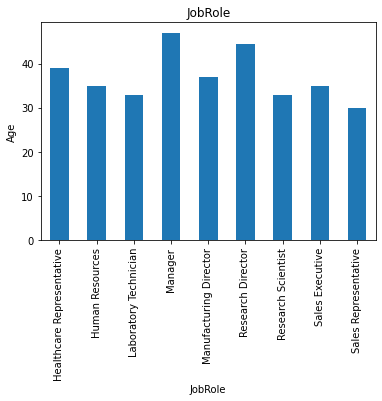

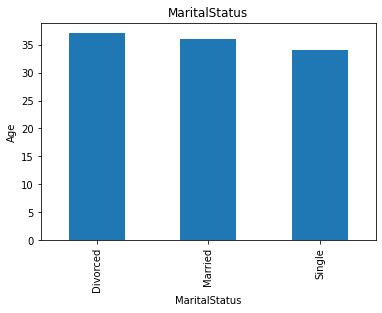

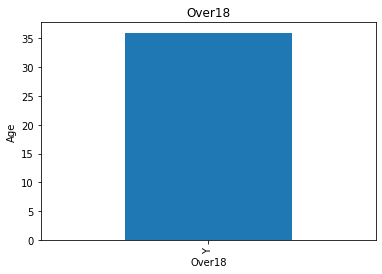

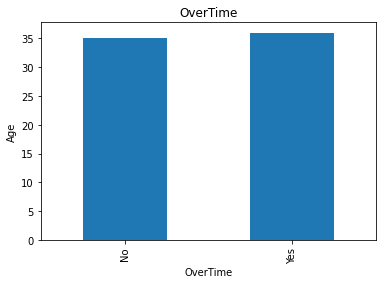

In [ ]:
for feature in categorical_features:
  data = df.copy()
  data.groupby(feature)["Age"].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Age")
  plt.title(feature)
  plt.show()

In [ ]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df[categorical_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [ ]:
df["MaritalStatus"] = label_encoder.fit_transform(df["MaritalStatus"])
df["MaritalStatus"].head()

0    2
1    1
2    2
3    1
4    1
Name: MaritalStatus, dtype: int64

In [ ]:
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Gender"].head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [ ]:
df["Over18"] = label_encoder.fit_transform(df["Over18"])
df["Over18"].head()

0    0
1    0
2    0
3    0
4    0
Name: Over18, dtype: int64

In [ ]:
df["OverTime"] = label_encoder.fit_transform(df["OverTime"])
df["OverTime"].head()

0    1
1    0
2    1
3    1
4    0
Name: OverTime, dtype: int64

In [ ]:
df[categorical_features]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,0,Sales Executive,2,0,1
1,Travel_Frequently,Research & Development,Life Sciences,1,Research Scientist,1,0,0
2,Travel_Rarely,Research & Development,Other,1,Laboratory Technician,2,0,1
3,Travel_Frequently,Research & Development,Life Sciences,0,Research Scientist,1,0,1
4,Travel_Rarely,Research & Development,Medical,1,Laboratory Technician,1,0,0
...,...,...,...,...,...,...,...,...
2935,Travel_Frequently,Research & Development,Medical,1,Laboratory Technician,1,0,0
2936,Travel_Rarely,Research & Development,Medical,1,Healthcare Representative,1,0,0
2937,Travel_Rarely,Research & Development,Life Sciences,1,Manufacturing Director,1,0,1
2938,Travel_Frequently,Sales,Medical,1,Sales Executive,1,0,0


In [ ]:
df = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', "EducationField", "JobRole"])
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,41,1102,1,2,1,2,0,94,3,2,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,49,279,8,1,1,3,1,61,2,2,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,37,1373,2,2,1,4,1,92,2,1,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,33,1392,3,4,1,4,0,56,3,1,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,27,591,2,1,1,1,1,40,3,1,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
feature_scale = [feature for feature in df.columns if feature not in ["Attrition"]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale].apply(pd.to_numeric))

MinMaxScaler()

In [ ]:
scaler.transform(df[feature_scale])

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 1.        , 0.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 0.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
df = pd.concat([df[["Attrition"]].reset_index(drop = True),
                  pd.DataFrame(scaler.transform(df[feature_scale]), columns = feature_scale)],
                 axis = 1)

In [ ]:
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,0.547619,0.715820,0.000000,0.25,0.0,0.333333,0.0,0.914286,0.666667,0.25,1.000000,1.0,0.262454,0.698053,0.888889,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.738095,0.126700,0.250000,0.00,0.0,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.452381,0.909807,0.035714,0.25,0.0,1.000000,1.0,0.885714,0.333333,0.00,0.666667,1.0,0.056925,0.012126,0.666667,0.0,1.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.357143,0.923407,0.071429,0.75,0.0,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.5,0.100053,0.845814,0.111111,0.0,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.214286,0.350036,0.035714,0.00,0.0,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


##Feature Selection

In [ ]:
x = df.drop(columns = "Attrition", axis = 1)
y = df["Attrition"]

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support() # True- Important Feature and False- Not Important Feature

array([ True, False,  True, False, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True])

In [ ]:
selected_feat = x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 50
selected features: 22
features with coefficients shrank to zero: 28


In [ ]:
selected_feat

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'EducationField_Medical', 'EducationField_Technical Degree',
       'JobRole_Laboratory Technician', 'JobRole_Sales Representative'],
      dtype='object')

In [ ]:
x= df[selected_feat]

In [ ]:
x.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Research & Development,EducationField_Medical,EducationField_Technical Degree,JobRole_Laboratory Technician,JobRole_Sales Representative
0,0.547619,0.000000,0.333333,0.0,0.666667,0.25,1.000000,1.0,0.888889,1.0,0.000000,0.000000,0.000000,0.222222,0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.738095,0.250000,0.666667,1.0,0.333333,0.25,0.333333,0.5,0.111111,0.0,1.000000,0.333333,0.666667,0.388889,0.411765,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.452381,0.035714,1.000000,1.0,0.333333,0.00,0.666667,1.0,0.666667,1.0,0.333333,0.000000,0.666667,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.357143,0.071429,1.000000,0.0,0.666667,0.00,0.666667,0.5,0.111111,1.0,0.666667,0.000000,0.666667,0.388889,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.214286,0.035714,0.000000,1.0,0.666667,0.00,0.333333,0.5,1.000000,0.0,1.000000,0.333333,0.666667,0.111111,0.117647,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2205, 22) (735, 22) (2205,) (735,)


##Applying the Machine Learning Model

Using Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 20,criterion='entropy',random_state = 0)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

In [ ]:
pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

0.9496598639455782

In [ ]:
score = rf.score(x_test, y_test)
print('Randomforest Classifier', np.abs(score)*100)

Randomforest Classifier 94.96598639455782


In [ ]:
input_data = x[360 : 361]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.92857143 0.         1.         1.         0.66666667 0.25
  0.66666667 0.5        0.22222222 0.         0.66666667 0.
  0.66666667 0.11111111 0.11764706 0.         0.         1.
  1.         0.         0.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
input_data_to_array_reshape # We can see one row and all the columns

array([[0.92857143, 0.        , 1.        , 1.        , 0.66666667,
        0.25      , 0.66666667, 0.5       , 0.22222222, 0.        ,
        0.66666667, 0.        , 0.66666667, 0.11111111, 0.11764706,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
predictions = rf.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "1"):
  print("The employee will leave the company")
else:
  print("The employee will not leave the company")

[0]
The employee will not leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
y[360]

0

Using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [ ]:
y_predict = dtc.predict(x_test)
print(y_predict)

[0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [ ]:
print("Model Accuracy is",accuracy_score(y_test, y_predict) )

Model Accuracy is 0.9591836734693877


In [ ]:
print('Decision Tree Classifier', np.abs(accuracy_score(y_test, y_predict))*100)

Decision Tree Classifier 95.91836734693877


In [ ]:
input_data = x[450 : 451]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.30952381 0.03571429 0.33333333 1.         0.66666667 0.25
  1.         1.         0.44444444 1.         0.66666667 0.
  1.         0.27777778 0.29411765 0.         0.         0.
  0.         0.         0.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
predictions = dtc.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "1"):
  print("The employee will leave the company")
else:
  print("The employee will not leave the company")

[1]
The employee will not leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [ ]:
y[450]

0

Using Lasso Regression

In [ ]:
# helper function to visualize feature importance from random forest and LASSO
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'blue')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

In [ ]:
# build a LASSO model for feature selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x_train, y_train)
coef = pd.DataFrame(reg.coef_, index = x_train.columns)
coef = imp_df(x_train.columns, reg.coef_)

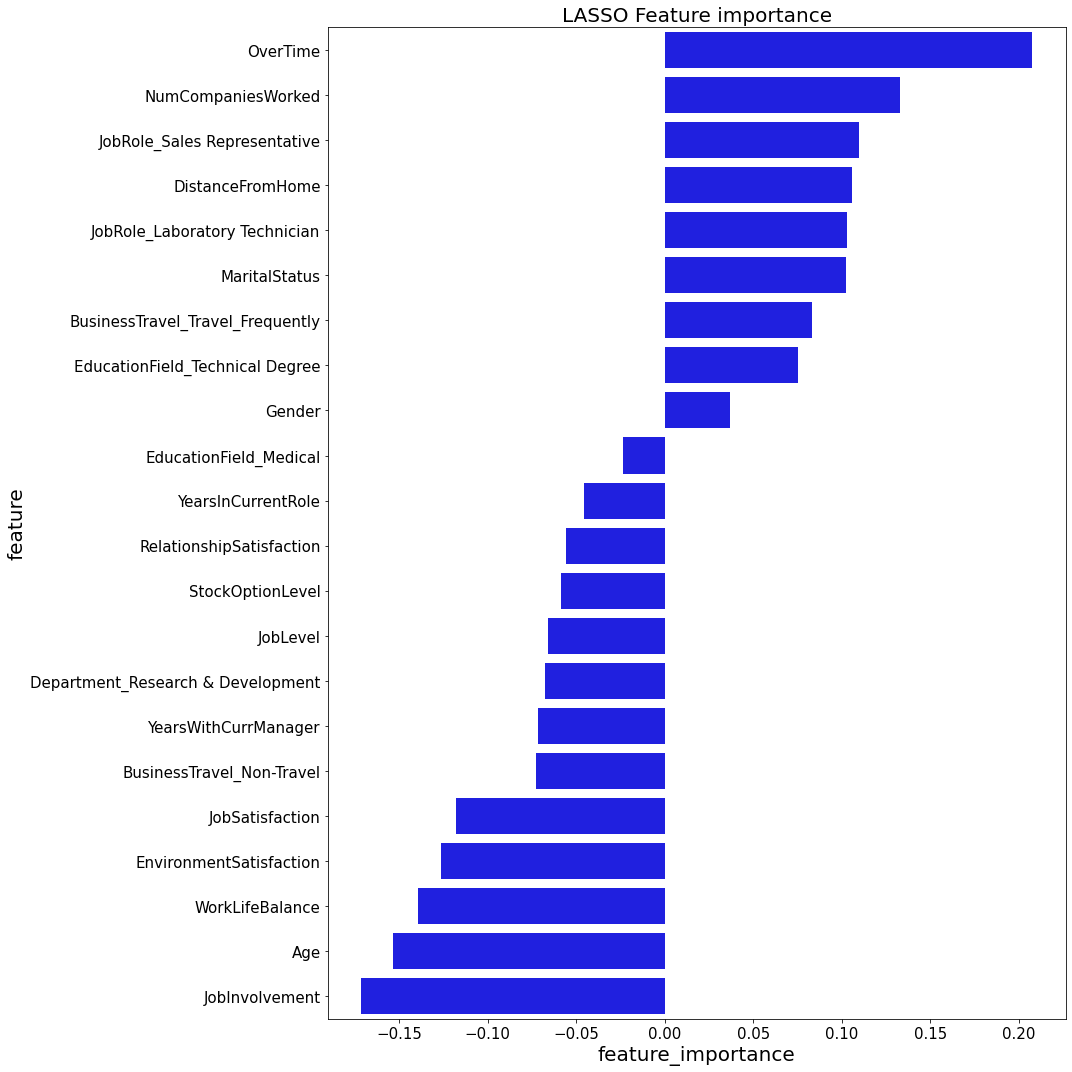

In [ ]:
plt.figure(figsize=(15, 15))
var_imp_plot(coef, 'LASSO Feature importance')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Model Testing Accuracy is - ',(TP+TN)/(TP+TN+FP+FN))
print('Misclassification Rate - ',(FP+FN)/(TP+TN+FP+FN))
print('Precission Rate - ',(TP)/(TP+FP))
print('Recall Rate - ',(TP)/(TP+FN))

[[616   0]
 [ 37  82]]
Model Testing Accuracy is -  0.9496598639455782
Misclassification Rate -  0.050340136054421766
Precission Rate -  1.0
Recall Rate -  0.6890756302521008


Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_train = model.predict(x_train)
training_data_accuracy = accuracy_score(y_pred_train, y_train)

In [ ]:
print(f"The training accuracy of the logistic regression model is {training_data_accuracy}")

The training accuracy of the logistic regression model is 0.8789115646258503


In [ ]:
y_pred_test = model.predict(x_test)
test_data_accuracy = accuracy_score(y_pred_test, y_test)

In [ ]:
print(f"The test accuracy of the logistic regression model is {test_data_accuracy * 100}")

The test accuracy of the logistic regression model is 90.61224489795919


In [ ]:
input_data = x[207 : 208]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.42857143 0.60714286 0.33333333 0.         0.66666667 0.
  1.         1.         0.11111111 0.         0.         0.
  0.66666667 0.05555556 0.41176471 0.         1.         1.
  1.         0.         1.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
input_data_to_array_reshape # We can see one row and all the columns

array([[0.42857143, 0.60714286, 0.33333333, 0.        , 0.66666667,
        0.        , 1.        , 1.        , 0.11111111, 0.        ,
        0.        , 0.        , 0.66666667, 0.05555556, 0.41176471,
        0.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
predictions = model.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "1"):
  print("The employee will leave the company")
else:
  print("The employee will not leave the company")

[0]
The employee will not leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
print(y[207])

0


In [ ]:
input_data = x[300 : 301]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.54761905 0.03571429 1.         1.         0.66666667 0.75
  0.33333333 1.         0.11111111 0.         0.33333333 0.
  0.66666667 0.55555556 0.23529412 0.         0.         0.
  0.         0.         0.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
input_data_to_array_reshape # We can see one row and all the columns

array([[0.54761905, 0.03571429, 1.        , 1.        , 0.66666667,
        0.75      , 0.33333333, 1.        , 0.11111111, 0.        ,
        0.33333333, 0.        , 0.66666667, 0.55555556, 0.23529412,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
predictions = model.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "1"):
  print("The employee will not leave the company")
else:
  print("The employee will leave the company")

[0]
The employee will leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
print(y[300])

0


In [ ]:
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,0.547619,0.715820,0.000000,0.25,0.0,0.333333,0.0,0.914286,0.666667,0.25,1.000000,1.0,0.262454,0.698053,0.888889,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.738095,0.126700,0.250000,0.00,0.0,0.666667,1.0,0.442857,0.333333,0.25,0.333333,0.5,0.217009,0.916001,0.111111,0.0,0.0,0.857143,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,0.452381,0.909807,0.035714,0.25,0.0,1.000000,1.0,0.885714,0.333333,0.00,0.666667,1.0,0.056925,0.012126,0.666667,0.0,1.0,0.285714,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.357143,0.923407,0.071429,0.75,0.0,1.000000,0.0,0.371429,0.666667,0.00,0.666667,0.5,0.100053,0.845814,0.111111,0.0,1.0,0.000000,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.214286,0.350036,0.035714,0.00,0.0,0.000000,1.0,0.142857,0.666667,0.00,0.333333,0.5,0.129489,0.583738,1.000000,0.0,0.0,0.071429,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
input_data = x[2 : 3]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.45238095 0.03571429 1.         1.         0.33333333 0.
  0.66666667 1.         0.66666667 1.         0.33333333 0.
  0.66666667 0.         0.         0.         0.         1.
  0.         0.         1.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
input_data_to_array_reshape # We can see one row and all the columns

array([[0.45238095, 0.03571429, 1.        , 1.        , 0.33333333,
        0.        , 0.66666667, 1.        , 0.66666667, 1.        ,
        0.33333333, 0.        , 0.66666667, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
predictions = model.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "0"):
  print("The employee will not leave the company")
else:
  print("The employee will leave the company")

[1]
The employee will leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
print(y[2])

1


In [ ]:
input_data = x[234 : 235]
input_data_to_array = np.asarray(input_data)
print(input_data_to_array)

[[0.35714286 0.46428571 0.66666667 1.         0.66666667 0.
  1.         0.5        0.55555556 1.         0.66666667 0.33333333
  0.         0.22222222 0.23529412 0.         0.         1.
  1.         0.         1.         0.        ]]


In [ ]:
input_data_to_array_reshape = input_data_to_array.reshape(1, -1) # 1 means one row and -1 means multiple columns

In [ ]:
input_data_to_array_reshape # We can see one row and all the columns

array([[0.35714286, 0.46428571, 0.66666667, 1.        , 0.66666667,
        0.        , 1.        , 0.5       , 0.55555556, 1.        ,
        0.66666667, 0.33333333, 0.        , 0.22222222, 0.23529412,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        ]])

In [ ]:
predictions = model.predict(input_data_to_array_reshape)
print(predictions)
if (predictions[0] == "0"):
  print("The employee will not leave the company")
else:
  print("The employee will leave the company")

[1]
The employee will leave the company


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
y[234]

1

##Top Reasons why Employees leave the Organization:

1. No Overtime This was a surpirse, employees who don't have overtime are most likely to leave the organization. This could be that employees would like to have a higher amount of income or employees could feel that they are underused.

2. Num of companies worked: Number of companies worked indicates the experience of the employees and hence employees with more experience will tend to shift to companies with job roles requiring more experience and so will give more salary.

3. Distance from Home: This could also be expected, since people who are living at a long distance from the company will find it difficult to travel for long time.

Knowing the most likely reasons why employees leave the organization, can help the organization take action and reduce the level of Attrition inside the organization.

We have constructed a very simple pipeline of predicting employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing learning models in the form of a Logistic Regression, Random Forests Classification and Lisso Regression model. This whole notebook takes less than a minute to run and it even returns a 94% accuracy in its predictions for Random Forest Classifier and 90% accuracy for Logistic Regression Model.